In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def hypothesis(X, weights):
    return np.dot(X, weights)

In [6]:
def loss_func(X, weights, Y):
    loss = 0
    Y_pred = hypothesis(X, weights)
    loss = np.sum((Y_pred - Y)**2)
    return loss/X.shape[0]

In [7]:
def gradient(X, Y, weight):
    y_pred = hypothesis(X, weight)
    grad = np.dot(X.T, (y_pred - Y))
        
    return grad/X.shape[0]

In [8]:
def gradient_descent(X, Y):
    weights = np.zeros((X.shape[1], ))
    lr_rate = 0.03
    loss_epoch = []
    
    epochs = 1000
    
    for i in range(epochs):
        
        grad = gradient(X, Y, weights)
        
        loss_epoch.append(loss_func(X, weights, Y))
        
        weights = weights - lr_rate * grad
        
    return weights, loss_epoch

In [13]:
data = pd.read_csv('C:/Users/bhatt/OneDrive/Desktop/whisper-main/Assignments/prices-split-adjusted.csv/prices-split-adjusted.csv', nrows = 20000)

In [14]:
features = ['open', 'low', 'high', 'volume']
target = 'close'

In [15]:
X = data[features].values
Y = data[target].values

In [16]:
X.shape, Y.shape

((20000, 4), (20000,))

In [18]:
u = np.mean(X, axis = 0)
std = np.std(X, axis = 0)

In [20]:
print(u.shape, std.shape)

(4,) (4,)


In [21]:
X = (X - u)/std

In [22]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))

In [28]:
X.shape

(20000, 5)

In [29]:
split = 0.8

train_X = X[:int(split * X.shape[0]), :]
train_Y = Y[:int(split * X.shape[0])]
test_X = X[int(split * X.shape[0]):, :]
test_Y = Y[int(split * X.shape[0]):]

In [30]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(16000, 5) (16000,) (4000, 5) (4000,)


In [31]:
weights, loss_epoch = gradient_descent(train_X, train_Y)

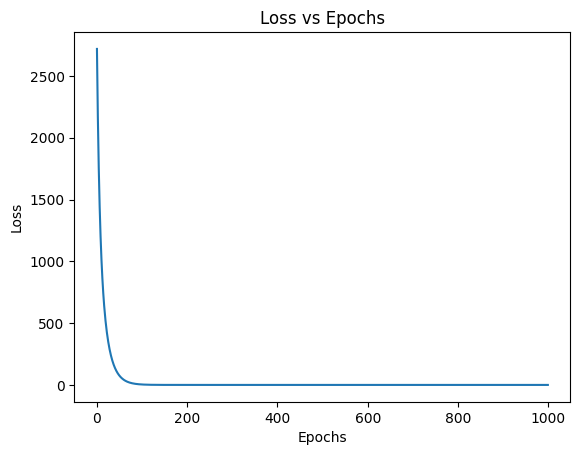

In [32]:
plt.plot(loss_epoch)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

In [33]:
def predict(X, weights):
    y_pred = []
    for i in range(X.shape[0]):
        y_pred.append(hypothesis(X[i], weights))
    return np.array(y_pred)

In [34]:
y_pred = predict(test_X, weights)

In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [36]:
mse = mean_squared_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)
mae = mean_absolute_error(test_Y, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 score: {r2}')

Mean Squared Error: 0.18407356665064634
Mean Absolute Error: 0.2574941996545873
R2 score: 0.9998237858372833


In [37]:
weights

array([ 3.95017513e+01,  1.10690783e+01,  1.12101958e+01,  1.12151537e+01,
       -1.57244260e-02])